# Reading and analyzing the data 

In [ ]:
rawData = open("/Users/mahmoudwatfa/Documents/TorontoMetropolitanUni/Capstone820/Coding/tripadvisor_hotel_reviews.csv").read()

In [29]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahmoudwatfa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Print some parts of the data to understand a bit about its structure
rawData[0:2306]

'Review,Rating\n"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ",4\n"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bat

In [3]:
# We want to form a list of review text followed by rating.
# We observe that the review text ends with a comma, few spaces and double quotation.
# This is then followed by the rating as a number, after which a new review text is available and so on
# We parse the data by replacing the comma, spaces and double quote with a new line and then we split on a new line
parsedData = rawData.replace(',  ",', '\n').split('\n')

In [4]:
# We print the result for the first 5 entries, noting that the first entry is a column title
# Now all the reviews and number ratings are in the form of a list
parsedData[0:5]

['Review,Rating',
 '"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night',
 '4',
 '"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting r

In [5]:
# We extract the review text starting at the second entry and then increments of 2
reviewList = parsedData[1::2]
# We extract the number rating starting at the third entry and then increments of 2
ratingList = parsedData[2::2]

In [6]:
# We print some of the entries to verify the result
print(reviewList[0:2])
print(ratingList[0:2])

['"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night', '"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unli

In [7]:
# We verify the length of the review list and the length of the number ratings
print('The number of review entries is:', len(reviewList))
print('The number of rating entries is:', len(ratingList))

The number of review entries is: 20492
The number of rating entries is: 20491


In [8]:
# Try to see what the last entry is
reviewList[-1]

''

In [9]:
# We remove the last entry as it is not associated with any review or rating
reviewList.pop()

''

In [10]:
# We verify again the length of the review list and the length of the number ratings
print('The number of review entries is:', len(reviewList))
print('The number of rating entries is:', len(ratingList))

The number of review entries is: 20491
The number of rating entries is: 20491


## Convert data into a dataframe & check for NULL entries

In [11]:
# Create a panda dataframe consisting of the rating and the review text
import pandas as pd
pd.set_option('display.max_colwidth', 100)
raw_rated_reviews = pd.DataFrame({
    'rating': ratingList,
    'review': reviewList
})

raw_rated_reviews.head()

,rating,review
0,4,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
2,3,"""nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathr..."
3,5,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
4,5,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."


In [12]:
raw_rated_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  20491 non-null  object
 1   review  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [13]:
raw_rated_reviews.isnull()

# Check if there is any missing review entry
count_1 = raw_rated_reviews["review"].isna().sum()
print('The number of missing review entries is:', count_1)

The number of missing review entries is: 0


## Check how many reviews there are per rating

In [14]:
import numpy as np

unique_ratings, count_ratings = np.unique(ratingList, return_counts=True)

for i in range(0,len(unique_ratings)):
    print('There are', count_ratings[i], 'reviews with a rating of: ', unique_ratings[i])

There are 1421 reviews with a rating of:  1
There are 1793 reviews with a rating of:  2
There are 2184 reviews with a rating of:  3
There are 6039 reviews with a rating of:  4
There are 9054 reviews with a rating of:  5


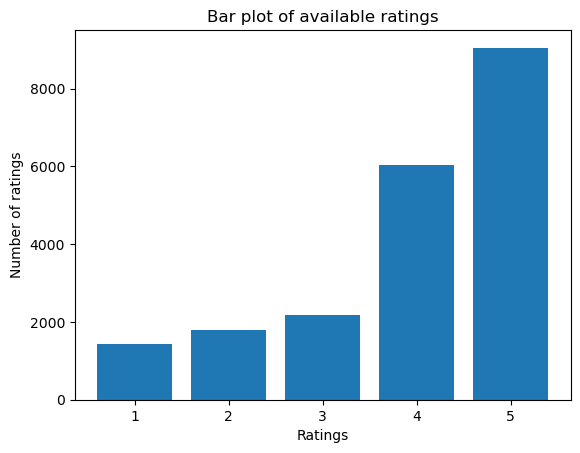

In [16]:
import matplotlib.pyplot as plt

plt.bar(unique_ratings, count_ratings)
plt.xlabel("Ratings")
plt.ylabel("Number of ratings")
plt.title("Bar plot of available ratings")
plt.show()

In [15]:
raw_rated_reviews.loc[0:20,:]

,rating,review
0,4,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
2,3,"""nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathr..."
3,5,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
4,5,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
5,5,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."
6,5,"""cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance co..."
7,4,"""excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exception..."
8,5,"""hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific be..."
9,5,"""excellent stayed hotel monaco past w/e delight, reception staff friendly professional room smar..."


In [16]:
# Save the data into another dataframe
processed_data = raw_rated_reviews
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  20491 non-null  object
 1   review  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


## Drop ratings that have value 3 (i.e. drop neutral ratings)

In [17]:
# Drop rows with ratings of 3 as they are neutral
drop_condition = processed_data['rating'] == '3'
# Verify length of reviews with rating of '3' to ensure it matches 2184 which was printed
# earlier
drop_condition.sum()

2184

In [18]:
processed_data = processed_data[~drop_condition]
processed_data.shape

(18307, 2)

In [19]:
# Confirm how many reviews are dropped with a rating of 3
20491 - 18307

2184

In [20]:
# Insert a 'label' column after 'rating' and set it to zero
processed_data.insert(1, 'label', 0)
processed_data.head()

,rating,label,review
0,4,0,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,0,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
3,5,0,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
4,5,0,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
5,5,0,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."


In [48]:
processed_data.loc[0:20]

,rating,label,review
0,4,0,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,0,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
3,5,0,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
4,5,0,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
5,5,0,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."
6,5,0,"""cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance co..."
7,4,0,"""excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exception..."
8,5,0,"""hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific be..."
9,5,0,"""excellent stayed hotel monaco past w/e delight, reception staff friendly professional room smar..."
10,2,0,"""poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beatin..."


In [22]:
# reset index of dataframe
processed_data = processed_data.reset_index(drop=True)
processed_data.loc[0:20]

,rating,label,review
0,4,0,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,0,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
2,5,0,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
3,5,0,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
4,5,0,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."
5,5,0,"""cozy stay rainy city, husband spent 7 nights monaco early january 2008. business trip chance co..."
6,4,0,"""excellent staff, housekeeping quality hotel chocked staff make feel home, experienced exception..."
7,5,0,"""hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific be..."
8,5,0,"""excellent stayed hotel monaco past w/e delight, reception staff friendly professional room smar..."
9,2,0,"""poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beatin..."


In [23]:
# Convert the 'rating' column to integer
processed_data['rating'] = processed_data['rating'].astype(int)
# Find indices of rating > 3 and rating < 3
pos_label_indices = processed_data[processed_data['rating'] > 3].index
neg_label_indices = processed_data[processed_data['rating'] < 3].index
print(len(pos_label_indices))
print(len(neg_label_indices))

15093
3214


In [24]:
processed_data.head()

,rating,label,review
0,4,0,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,0,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
2,5,0,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
3,5,0,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
4,5,0,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."


## Add new 'label' column of +1 (rating > 3) or -1 (rating < 3)

In [25]:
# Set the labels accordingly in the 'label' column
# Rating value > 3 will be labelled as +1, otherwise < 3 is -1
processed_data.loc[pos_label_indices, 'label'] = 1
processed_data.loc[neg_label_indices, 'label'] = -1
processed_data.head()

,rating,label,review
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took ad..."
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, st..."
2,5,1,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown ..."
3,5,1,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room..."
4,5,1,"""love monaco staff husband stayed hotel crazy weekend attending memorial service best friend hus..."


In [26]:
type(processed_data['label'])

pandas.core.series.Series

In [27]:
len(processed_data[processed_data['label'] == 1].index)
#len(processed_data[processed_data['label'] == -1].index)

15093

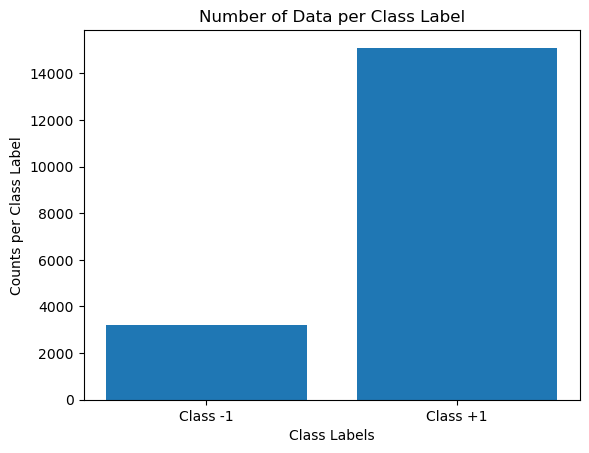

In [1]:
# Bar chart of counts per labels
import matplotlib.pyplot as plt


class_labels = ['Class -1', 'Class +1']
counts = [3214, 15093]


plt.bar(class_labels, counts)


plt.xlabel('Class Labels')
plt.ylabel('Counts per Class Label')
plt.title('Number of Data per Class Label')


plt.show()

# Start pre-processing phase

## Define more stop words (i.e. in addition to those in nltk)

In [31]:
# Add some more stop words as these are not part of the ntltk stopwords and they can
# actually appear in reviews. This is to take an extra measure for stopword removal.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
my_stop_words = stop_words
more_stop_words = ["n't", "st", "nd", "rd", "nt", "youre", "werent", "theyre", "wont", "youve",
                  "youll", "youd", "thatll", "hasnt", "havent", "wasnt", "were", "we'll", "th", 
                  "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",
                  "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "wo", "hm",
                  "hmm", "hmmmm", "hmmmmm", "hmmmmmm", "hmmmmmmm"]

# Create stop words to be nltk stopwords plus the stopwords above
my_stop_words = my_stop_words + more_stop_words
print(my_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
pd.set_option('display.max_colwidth', 2000)
processed_data.head(5)

,rating,label,review
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night"
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle"
2,5,1,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay"
3,5,1,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house keeping walked girlfriend getting dressed, did n't hear knock doin

## Pre-processing: remove punctuation, digits, stop-words
## Convert to lower case

In [32]:
# Data cleaning
# Aim: remove punctuation, remove digits, remove extra white spaces
# Output: new 'clean_data' column

import string
import re
from nltk.tokenize import word_tokenize

def clean_text(text):
    
    
    # Remove punctuation using split. This gives a list of words
    text_no_punct = re.split(r'\W+', text)
    # Join each element of the list to get the sentence again
    text_no_punct = ' '.join(text_no_punct)
    
    
    # remove punctuation and convert to lower case
    #text_no_punct = "".join([this_char.lower() for this_char in text if this_char not in string.punctuation])
    
    #print('After punctuation removal:', text_no_punct)

    #remove digits
    text_no_digits = re.split(r'\d+', text_no_punct)
    text_no_digits = ''.join(text_no_digits)
    
    #remove stopwords
    words = text_no_digits.split()
    no_stop_words = ' '.join([word.lower() for word in words if word.lower() not in my_stop_words])

    #print("Text after digit removal: ", text_no_digits)

    #remove extra white spaces
    #cleaned_text = ' '.join(re.split(r'\s+', text_no_digits))
    # The above does not remove leading or trailing whitespaces
    
    # The below removes leading or trailing whitespaces, we can use it
    #cleaned_text = (' '.join(re.split(r'\s+', text_no_digits))).strip()
    
    # This also removes leading and trailing whitespaces. Will use this one
    cleaned_text = re.sub(r'\s+', ' ', no_stop_words).strip()
    

    return cleaned_text

In [35]:
# Clean the data and save it inot a new column called "clean_review"
processed_data['clean_review'] = processed_data['review'].apply(clean_text)

In [36]:
processed_data.head(5)

,rating,label,review,clean_review
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle",ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guest staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels gee best breakfast spots seattle block away convenient hotel know exist arrived late night pm inside run bellman busy chating cell phone help bags prior arrival emailed hotel inform anniversary half really picky wanted make sure good got nice email saying like deliver bottle champagne chocolate cov

In [39]:
# This is to store the data and re-use later instead of repeating everything again
stored_processed_data = processed_data
stored_processed_data.head()
stored_processed_data = stored_processed_data.drop('review', axis=1)
stored_processed_data.head()

,rating,label,clean_review
0,4,1,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guest staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels gee best breakfast spots seattle block away convenient hotel know exist arrived late night pm inside run bellman busy chating cell phone help bags prior arrival emailed hotel inform anniversary half really picky wanted make sure good got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate told needed foam pillows arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property impressed left morning shopping room got short trips hours beds comfortable good ac heat control inch screen bring green shine directly eyes night light sensitive tape controls start hotel clean business hotel super high rates better chain hotels seattle
2,5,1,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel worked suite laptops decor lovely eclectic mix pattens color palatte animal print bathrobes feel like rock stars nice look like sterile chain hotel hotel personality excellent stay
3,5,1,great stay great stay went seahawk game awesome downfall view building complain room huge staff helpful booked hotels website seahawk package charge parking got voucher taxi problem taxi driver want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second realize said fact speak language face priceless ass told said large city told head doorman issue called cab company promply answer apologized offered pay taxi bucks miles stadium game plan taxi return going humpin great walk mind right christmas wonderful lights homeless stowed away building entrances leave police presence greatest area stadium activities blocks pike street waterfront great coffee shops way hotel mantained foyer awesome wine tasting available evening best dog taking bernard time family safes hotel located service desk room bathroom huge jetted tub huge funny house keeping walked girlfriend getting dressed hear knock turn service screamed girlfriend screams hit floor laughing started talking spanish worked place recommend price check online deals good better besite contains deals vouchers travel websites tell
4,5,1,love monaco staff husband stayed hotel crazy weekend attending memorial service bes

In [40]:
# Save the DataFrame to a CSV file
processed_data.to_csv('stored_dataframe.csv', index=False)

In [42]:
#THIS IS USED JUST FOR MY TESTING

# Read the stored data again
#loaded_df = pd.read_csv('stored_dataframe.csv')
#loaded_df.head()

,rating,label,review,clean_review
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle",ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guest staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels gee best breakfast spots seattle block away convenient hotel know exist arrived late night pm inside run bellman busy chating cell phone help bags prior arrival emailed hotel inform anniversary half really picky wanted make sure good got nice email saying like deliver bottle champagne chocolate cov

In [43]:
processed_data.head()

,rating,label,review,clean_review
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle",ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guest staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels gee best breakfast spots seattle block away convenient hotel know exist arrived late night pm inside run bellman busy chating cell phone help bags prior arrival emailed hotel inform anniversary half really picky wanted make sure good got nice email saying like deliver bottle champagne chocolate cov

## Pre-processing: spelling correction

In [44]:
# Correct spelling and save the result into a new column called "correct_spell"

import time

# Record the start time
start_time = time.time()

import pandas as pd
from autocorrect import Speller

# Create a function for spelling correction
def spell_correct(text):
    spell = Speller()
    corrected_text = spell(text)
    return corrected_text

processed_data['correct_spell'] = processed_data['clean_review'].apply(spell_correct)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

Time taken: 33246.67590093613 seconds


In [45]:
processed_data.head()

,rating,label,review,clean_review,correct_spell
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bands doors opening closing hear people talking hallway maybe noisy neighbors lveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle",ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation

In [ ]:
# Save the DataFrame to a CSV file - to be re-used when needed without repeating previous
# work as shown above
processed_data.to_csv('stored_processed_data.csv', index=False)

In [4]:
# Read the saved data
import pandas as pd


file_path = '/Users/mahmoudwatfa/Documents/TorontoMetropolitanUni/Capstone820/Coding/stored_processed_data.csv'
retrieved_processed_data = pd.read_csv(file_path)

In [3]:
retrieved_processed_data.head()

,rating,label,review,clean_review,correct_spell
0,4,1,"""nice hotel expensive parking got good deal st...",nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,2,-1,"""ok nothing special charge diamond member hilt...",ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,5,1,"""unique, great stay, wonderful time hotel mona...",unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
3,5,1,"""great stay great stay, went seahawk game awes...",great stay great stay went seahawk game awesom...,great stay great stay went seahawks game aweso...
4,5,1,"""love monaco staff husband stayed hotel crazy ...",love monaco staff husband stayed hotel crazy w...,love monaco staff husband stayed hotel crazy w...


In [5]:
pd.set_option('display.max_colwidth', 2000)
retrieved_processed_data.head(10)

,rating,label,review,clean_review,correct_spell
0,4,1,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bands doors opening closing hear people talking hallway maybe noisy neighbors lveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night
1,2,-1,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle",ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation

## Pre-processing: apply stemming

In [6]:
# Perform stemming
import nltk
p_stemmer = nltk.PorterStemmer()

def stem_text(text_to_stem):
    token_words = text_to_stem.split()
    stemmed_text = [p_stemmer.stem(word) for word in token_words]
    return stemmed_text

## End pre-processing with stemming

In [ ]:
# INTENTIONALLY LEFT EMPTY

# Start Feature generation: TF-IDF

In [35]:
# # Create TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=stem_text)
all_data_tfidf = tfidf_vect.fit_transform(retrieved_processed_data['correct_spell'])
print(all_data_tfidf.shape)



(18307, 20611)


In [36]:
# Create the final data as X_all_df
X_all_df=pd.DataFrame(all_data_tfidf.toarray())
X_all_df.columns=tfidf_vect.get_feature_names_out()


In [38]:
the_column_names = tfidf_vect.get_feature_names_out()
print(the_column_names[1:500])

['__' '___' '____' '___c' '___f' '___îè' '___îè_' '__a' '__ade' '__chain'
 '__oi' '__rich' '__àhi' '__ç' '__ç_' '__ç__' '__ç_à_he' '__ç_àêo'
 '__ç_é_' '__çî' '__çî_' '_a' '_after' '_always_' '_bird' '_ck' '_e'
 '_e__ç_é' '_e__ç_é_' '_f' '_he' '_hen' '_hey' '_hi' '_howev' '_huge_'
 '_ic' '_int__ç_' '_ip' '_lobbi' '_lowstrass' '_luggag' '_me' '_navbox_'
 '_o' '_octan' '_on__ç_é_' '_ore' '_ranger' '_riomph' '_rstendamm' '_t'
 '_though' '_tool' '_torpedo' '_total' '_tre' '_ubb' '_ut' '_which'
 '_x__ç_' '_èæ' '_êteau' '_ù' 'aa' 'aaa' 'aaaa' 'aaaaaa' 'aaaaaaaaa'
 'aaaaaaaaaaaaaaa' 'aaahhh' 'aab' 'aaffaa' 'aah' 'aaron' 'aarrgh' 'ab'
 'abac' 'abandon' 'abbeloui' 'abbey' 'abbot' 'abbott' 'abbr' 'abbrev'
 'abbrevi' 'abc' 'abd' 'abderahim' 'abdic' 'abdomin' 'abdulaziz' 'abe'
 'abel' 'abelian' 'aber' 'abercrombi' 'aberdeen' 'abid' 'abigail' 'abil'
 'abl' 'abnorm' 'aboard' 'abod' 'abomin' 'aborigin' 'abort' 'abound'
 'about' 'aboutth' 'abov' 'abraham' 'abras' 'abreast' 'abroad' 'abrupt'
 'abruzzo' 

In [39]:
# test if ok is in the features
"ok" in the_column_names

True

In [46]:
"okay" in the_column_names

True

# Split data into train data (70%) & test data (30%)

In [9]:
from sklearn.model_selection import train_test_split


# Fix to retain same result
random_seed = 22

# This represents the 'label' column in retrieved_processed_data
label = retrieved_processed_data['label']

# Split the data into training and test sets, considering class imbalance
X_train, X_test, y_train, y_test = train_test_split(X_all_df, label, test_size=0.3, random_state=random_seed, stratify=label)

In [47]:
len(y_test)

5493

# Train SVM classifier, perform 5-fold cross-validation

In [11]:
#SVM with cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

# Instantiate the SVM classifier
svm = SVC()

# Define the parameter grid to search
svm_param_CV = {
    'C': [0.1, 1, 10],          # Different values of C
    'kernel': ['linear', 'rbf'],    # Different kernel types
    
}

start_svc_CV = time.time()

svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_CV, cv=5)


svm_grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", svm_grid_search.best_params_)

# Get the best model
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_svm_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)



end_svc_CV = time.time()
total_svc_time = end_svc_CV - start_svc_CV
print("Total time in seconds to run SVM with GridSearchCV is:", total_svc_time)


Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy on test set: 0.9546695794647734
Total time in seconds to run SVM with GridSearchCV is: 48966.18931365013


## Train final SVM based on optimal parameters from above
## (I understand this info is already available above but
## I preferred to re-do this step separately)

In [12]:
# Build and run SVM classifier using CV parameters from above
# Output the performance metrics so that they are visible and saved
from sklearn.svm import SVC
import time

t_svm_start = time.time()

best_C = 10
best_kernel = 'rbf'
svm_classifier = SVC(C=best_C, kernel=best_kernel)
# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

t_svm_end = time.time()

# Evaluate the model
#svm_accuray = accuracy_score(y_test, svm_predictions)
#print("SVM Accuracy):", svm_accuray)


t_svm_needed = t_svm_end - t_svm_start
print("Final SVM classifier needs this time in seconds: ", t_svm_needed)

Final SVM classifier needs this time in seconds:  1542.6966931819916


## Performance metrics for SVM

In [13]:
# Compute other SVM performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Precision
svm_precision = precision_score(y_test, svm_predictions)
print("SVM Precision: ", svm_precision)

# Recall
svm_recall = recall_score(y_test, svm_predictions)
print("SVM Recall: ", svm_recall)

# Accuracy
svm_accuray = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy):", svm_accuray)

# F1 score
svm_f1_score = f1_score(y_test, svm_predictions)
print("SVM F1 Score: ", svm_f1_score)

# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print(f'Confusion Matrix for SVM:\n{svm_conf_matrix}')

SVM Precision:  0.9600171969045572
SVM Recall:  0.9860896445131375
SVM Accuracy): 0.9546695794647734
SVM F1 Score:  0.9728787713756671
Confusion Matrix for SVM:
[[ 778  186]
 [  63 4466]]


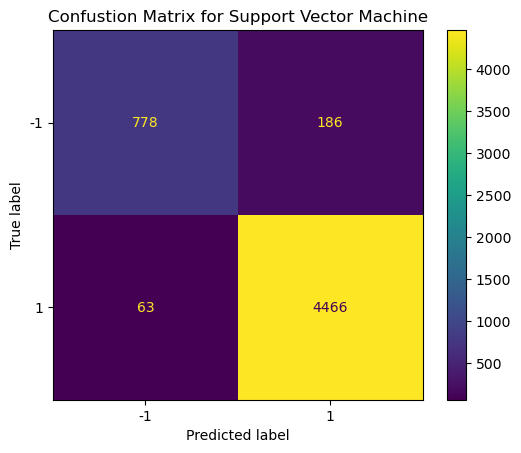

In [26]:
from sklearn import metrics 
from matplotlib import pyplot as plt
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_conf_matrix, display_labels = [-1, 1])
svm_cm_display.plot()
plt.title('Confustion Matrix for Support Vector Machine')
plt.show() 

# Train NB classifier, perform 5-fold cross-validation

In [13]:
# Naive Baye's with cross validation

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()


nb_param_grid = {
    'alpha': [0.1, 1.0, 10],  # For Laplace smoothing
    'fit_prior': [True, False],  # Learn class prior or assume equal prior (respectively)
}


nb_grid_search = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5)

start_nb_CV = time.time()


nb_grid_search.fit(X_train, y_train)


print("Best parameters:", nb_grid_search.best_params_)


# Get the best model
best_nb_model = nb_grid_search.best_estimator_

# Evaluate the model on the test set
nb_accuracy = best_nb_model.score(X_test, y_test)
print("Accuracy on test set using Naive Bayes:", nb_accuracy)



end_nb_CV = time.time()
total_nb_time = end_nb_CV - start_nb_CV
print("Total time in seconds to run Naive Bayes with GridSearchCV is:", total_nb_time)




Best parameters: {'alpha': 0.1, 'fit_prior': False}
Accuracy on test set using Naive Bayes: 0.9249954487529584
Total time in seconds to run Naive Bayes with GridSearchCV is: 42.346896171569824


## Train final NB classifier with optimal parameters from previous step

In [18]:
# Run Naive Bayes with best parameters and output performance so that they are saved
from sklearn.naive_bayes import MultinomialNB

t_nb_start = time.time()

best_alpha = 0.1
best_fit_prior = False
nb_classifier = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(X_test)

t_nb_end = time.time()

t_nb_needed = t_nb_end - t_nb_start
print("Final NB classifier needs this time in seconds: ", t_nb_needed)

Final NB classifier needs this time in seconds:  0.6587891578674316


## Performance metrics for NB classifier

In [19]:
# Compute other NB performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Precision
nb_precision = precision_score(y_test, nb_predictions)
print("Naive Bayes Precision: ", nb_precision)

# Recall
nb_recall = recall_score(y_test, nb_predictions)
print("Naive Bayes Recall: ", nb_recall)

# Accuracy
naive_bayes_accuray = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy):", naive_bayes_accuray)

# F1 score
nb_f1_score = f1_score(y_test, nb_predictions)
print("Naive Bayes F1 Score: ", nb_f1_score)

# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print(f'Confusion Matrix for Naive Bayes:\n{nb_conf_matrix}')

Naive Bayes Precision:  0.9741994932043307
Naive Bayes Recall:  0.9337602119673217
Naive Bayes Accuracy): 0.9249954487529584
Naive Bayes F1 Score:  0.9535512965050732
Confusion Matrix for Naive Bayes:
[[ 852  112]
 [ 300 4229]]


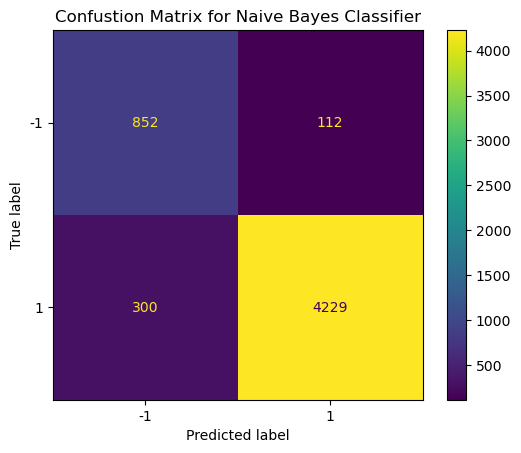

In [28]:
from sklearn import metrics 
cm_display_nb = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_conf_matrix, display_labels = [-1, 1])
cm_display_nb.plot()
plt.title('Confustion Matrix for Naive Bayes Classifier')
plt.show() 

# Train Logistic Regression, use 5-fold cross-validation for optimal parameters

In [14]:
# Logistic Regression with cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr_param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2'],  # Type of penalty to apply
}

# Create the GridSearchCV object
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5)

start_lr_CV = time.time()

# Fit the model to the training data
lr_grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", lr_grid_search.best_params_)

# Get the best model
best_lr_model = lr_grid_search.best_estimator_

# Evaluate the model on the test set
lr_accuracy = best_lr_model.score(X_test, y_test)
print("Accuracy on test set using Logistic Regression:", lr_accuracy)

end_lr_CV = time.time()
total_lr_time = end_lr_CV - start_lr_CV
print("Total time in seconds to run Logistic Regression with GridSearchCV is:", total_lr_time)


/Users/mahmoudwatfa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mahmoudwatfa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Best parameters: {'C': 10, 'penalty': 'l2'}
Accuracy on test set using Logistic Regression: 0.9532131804114328
Total time in seconds to run Logistic Regression with GridSearchCV is: 121.81369876861572


/Users/mahmoudwatfa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train final LR classifier with optimal parameters from previous step

In [22]:
# General Logistic Regression Classifier using best tuned parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

t_lr_start = time.time()

C_value = 10  # Replace with the desired value
lr_classifier = LogisticRegression(C=C_value)

# Train the model
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_classifier.predict(X_test)

t_lr_end = time.time()

# Evaluate the model
t_lr_needed = t_lr_end - t_lr_start
print("Final Logistic Regression classifier needs this time in seconds: ", t_lr_needed)

Final Logistic Regression classifier needs this time in seconds:  11.228628873825073


/Users/mahmoudwatfa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performance metrics for LR

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [24]:
# Get different performance metrics for Logistic Regression classifier

# Precision
lr_precision = precision_score(y_test, lr_predictions)
print("Logistic Regression Precision: ", lr_precision)

# Recall
lr_recall = recall_score(y_test, lr_predictions)
print("Logistic Regression Recall: ", lr_recall)

# Accuracy
log_reg_accuray = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy):", log_reg_accuray)


# F1 score
lr_f1_score = f1_score(y_test, lr_predictions)
print("Logistic Regression F1 Score: ", lr_f1_score)

# Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print(f'Confusion Matrix for Logistic Regression:\n{lr_conf_matrix}')

Logistic Regression Precision:  0.9607420189818809
Logistic Regression Recall:  0.9834400529918305
Logistic Regression Accuracy): 0.9532131804114328
Logistic Regression F1 Score:  0.9719585379159847
Confusion Matrix for Logistic Regression:
[[ 782  182]
 [  75 4454]]


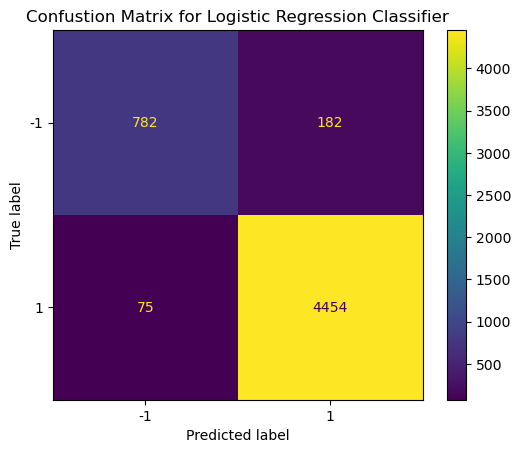

In [27]:
from sklearn import metrics 
lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_conf_matrix, display_labels = [-1, 1])
lr_cm_display.plot()
plt.title('Confustion Matrix for Logistic Regression Classifier')
plt.show() 

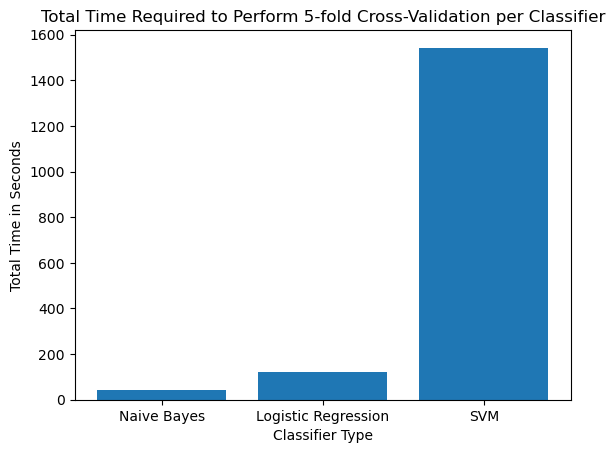

In [5]:
# Plot of time needed to run each classifier with cross-validation
classifier_type = ['Naive Bayes', 'Logistic Regression', 'SVM']
time_taken = [42.3468, 121.8136, 1542.6966]


plt.bar(classifier_type, time_taken)


plt.xlabel('Classifier Type')
plt.ylabel('Total Time in Seconds')
plt.title('Total Time Required to Perform 5-fold Cross-Validation per Classifier')


plt.show()

# END OF CODING